# E9 246 Advanced Image Processing - Assignment 2
***
*Submitted by: Dwaipayan Haldar*<br>
*S.R. No. : 27128*

In [1]:

import json
import os
import numpy as np
from PIL import Image, ImageDraw
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps"  if torch.backends.mps.is_available() else
    "cpu"
)

torch.manual_seed(42)
np.random.seed(42)

from src.P02_FCN import *
from src.P01_NCut import *

Using device: mps


### Problem 1: Graph Based Image Segmentation using Normalized Cuts

#### Problem 1(a)

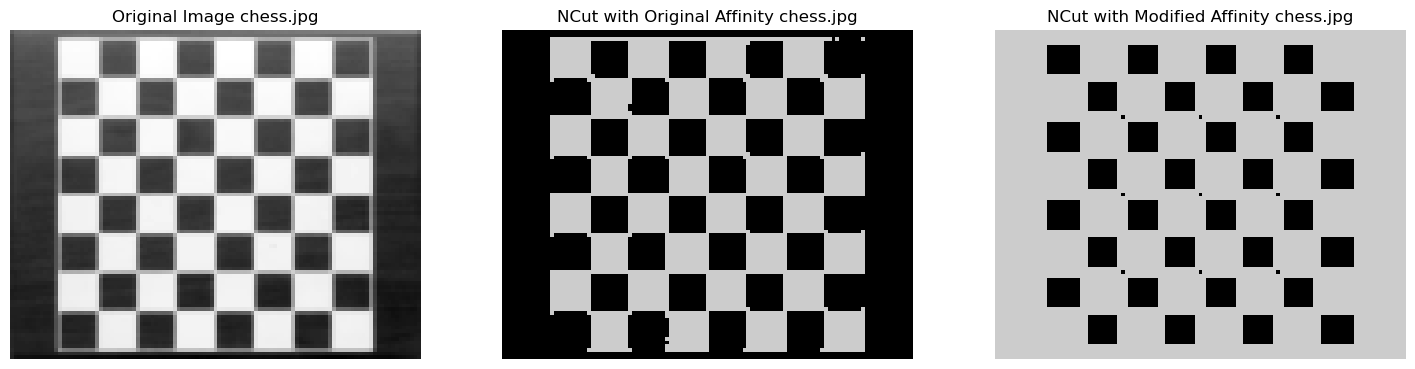

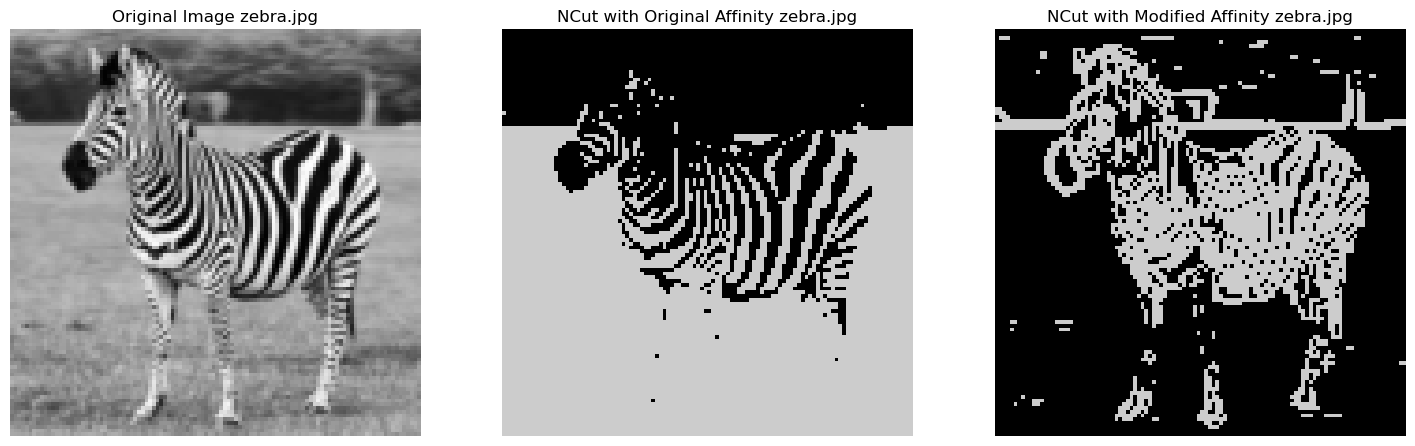

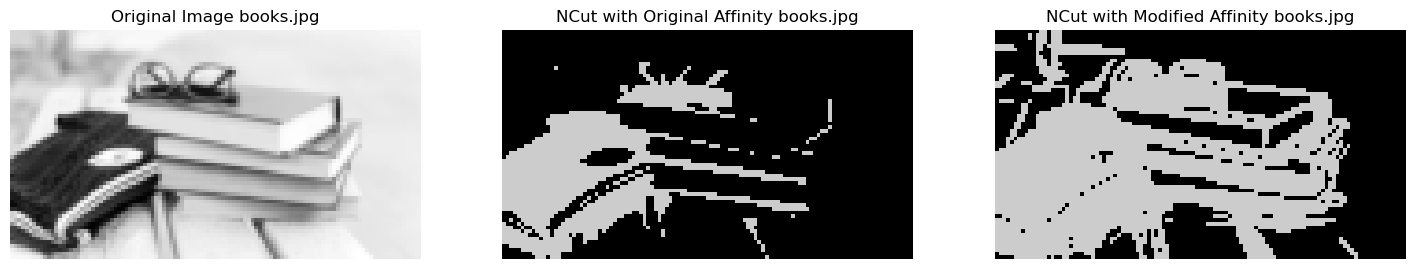

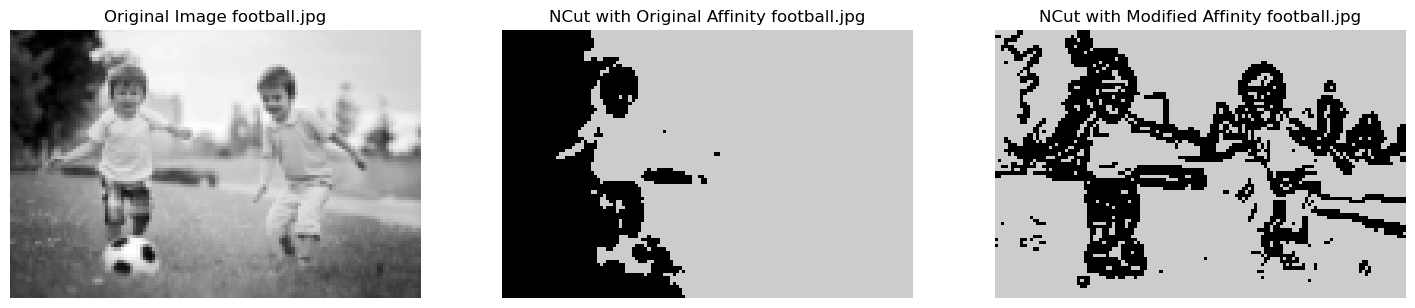

In [11]:
BASE_DIR   = os.path.join(os.path.expanduser("~"), "Downloads", "Notes and Books",
                          "IISc Coding Assignments and Project",
                          "E9-246-Advanced-Image-Processing", "Assignment_2")

for item in os.listdir(os.path.join(BASE_DIR, "Data/P01")):
    image = io.imread(os.path.join(BASE_DIR, "Data/P01", item))
    image = color.rgb2gray(image)

    #Scaling the image
    scale = 0.15
    H, W_img = image.shape
    image_small = resize(image, (int(H * scale), int(W_img * scale)), anti_aliasing=True)
    
    #Hyper-parameters
    sigma_I = 0.1
    sigma_X = 15.0
    sigma_E = 0.01

    W = adjacency_matrix(image_small, sigma_I, sigma_X)
    W_modified = adjacency_matrix_modified_affinity(image_small, sigma_I, sigma_X, sigma_E)


    _, labels = ncut_split(W)
    _, labels_modified = ncut_split(W_modified)

    labels = labels.reshape(image_small.shape[:2])
    labels_modified = labels_modified.reshape(image_small.shape[:2])

    plt.figure(figsize=(18,6))
    plt.subplot(1, 3, 1)
    plt.title(f"Original Image {item}")
    plt.imshow(image_small, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.title(f"NCut with Original Affinity {item}")
    plt.imshow(labels, cmap='nipy_spectral')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.title(f"NCut with Modified Affinity {item}")
    plt.imshow(labels_modified, cmap='nipy_spectral')
    plt.axis('off')
    plt.savefig(f"output/P01a_{item}_ncut_comparison.png")
    plt.show()

#### Problem 1(b)

In [17]:
zebra = io.imread(os.path.join(BASE_DIR, "Data/P01", "zebra.jpg"))
zebra = color.rgb2gray(zebra)

scale = 0.15
H, W_img = zebra.shape
zebra_small = resize(zebra, (int(H * scale), int(W_img * scale)), anti_aliasing=True)

football = io.imread(os.path.join(BASE_DIR, "Data/P01", "football.jpg"))
football = color.rgb2gray(football)

scale = 0.15
H, W_img = football.shape
football_small = resize(football, (int(H * scale), int(W_img * scale)), anti_aliasing=True)

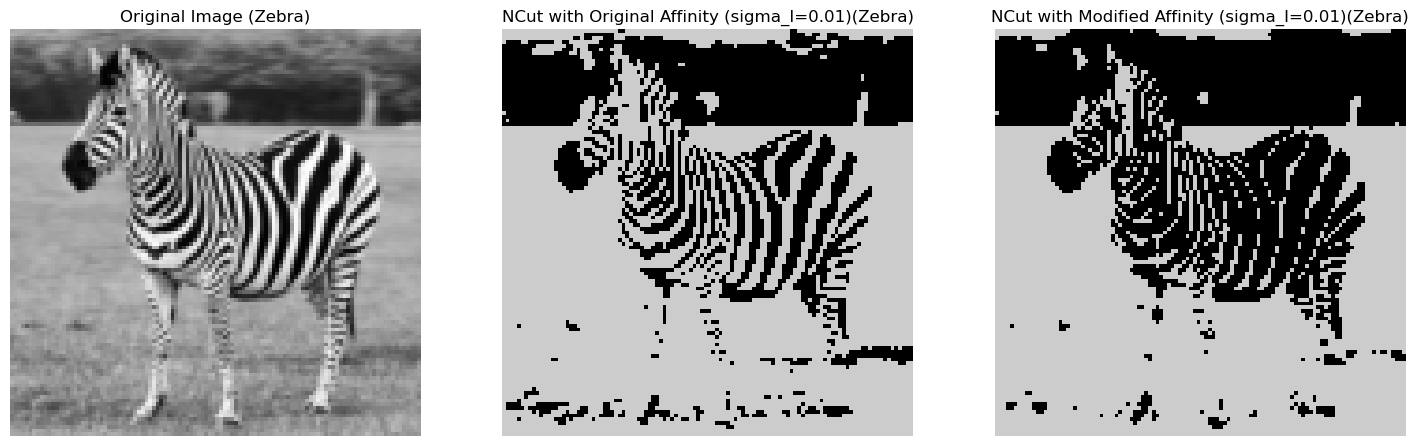

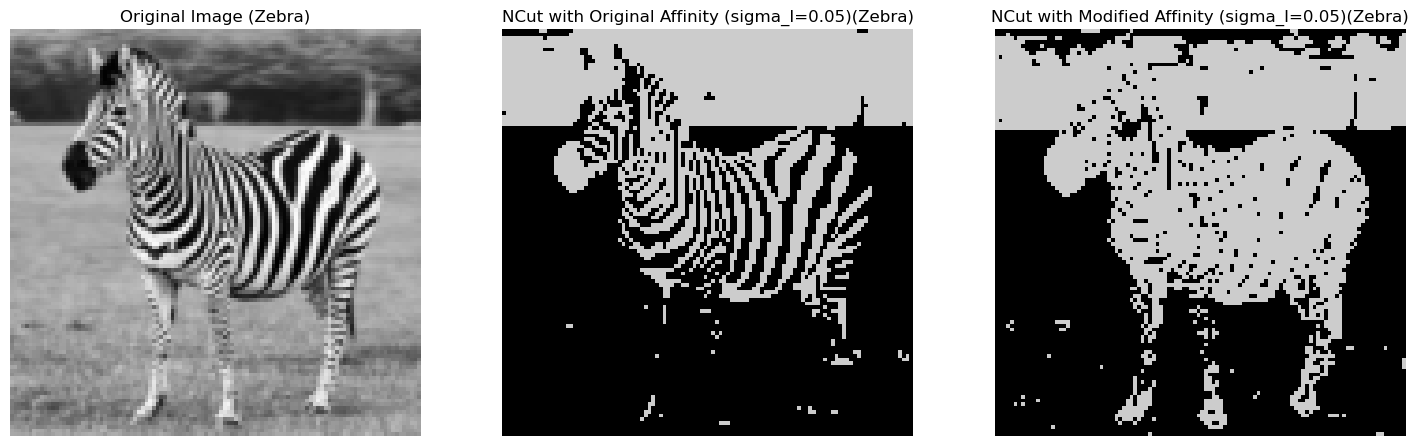

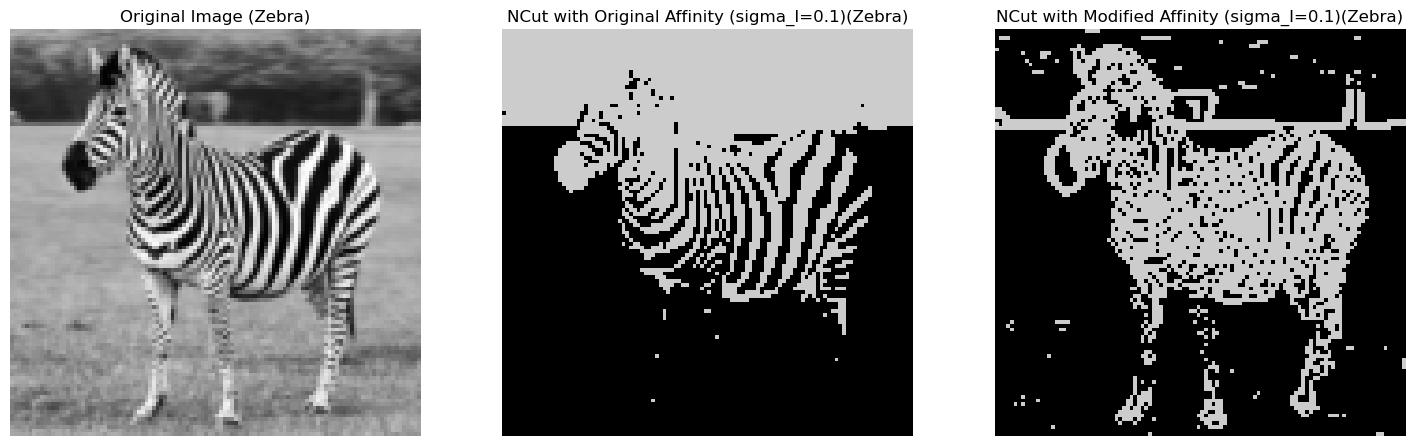

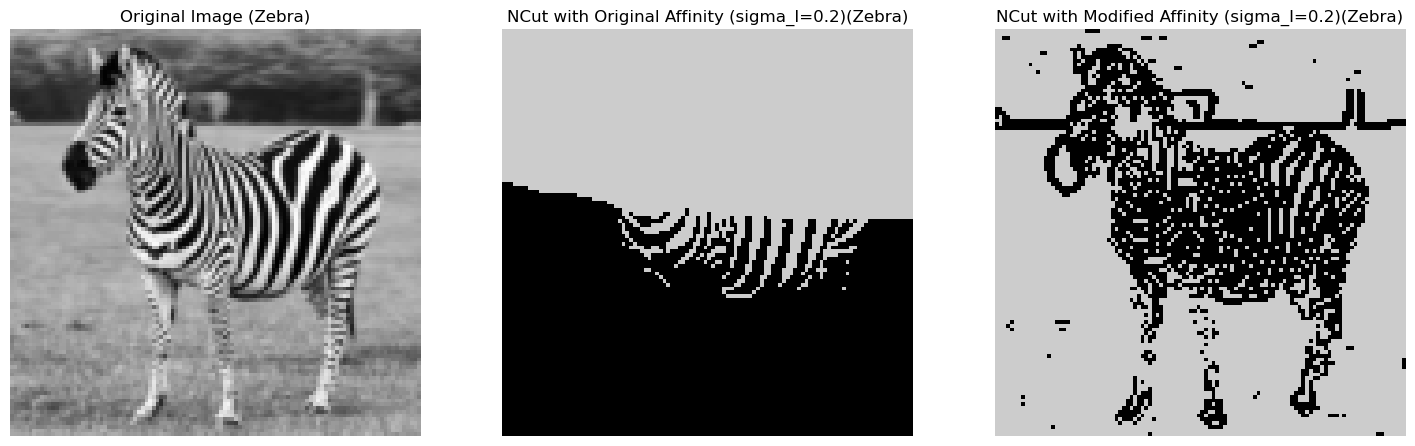

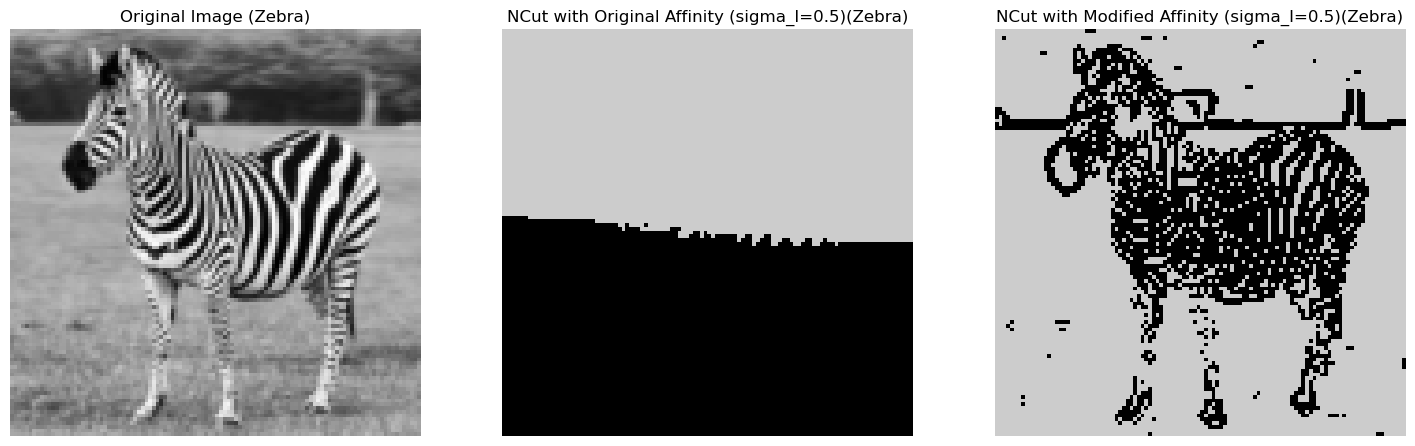

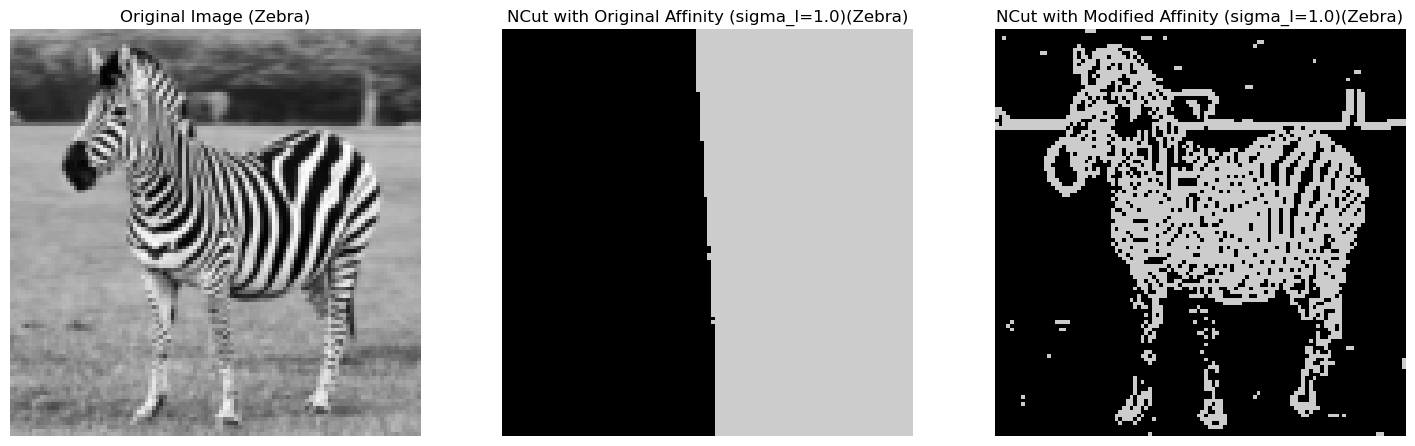

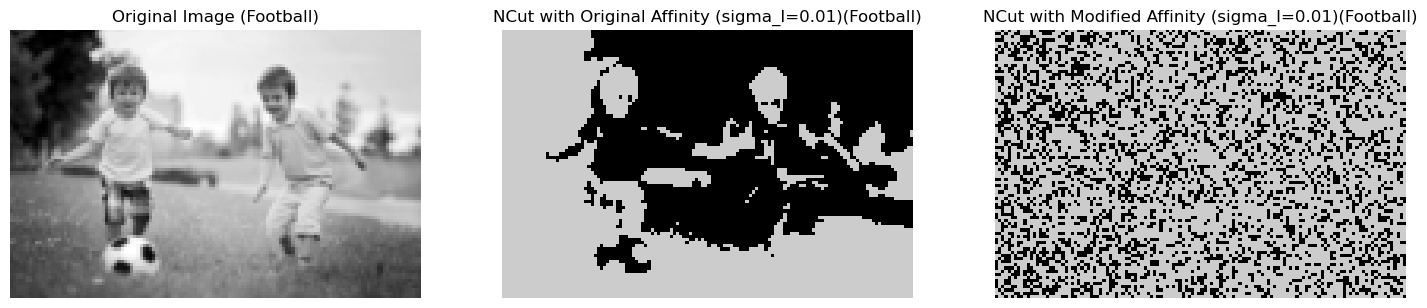

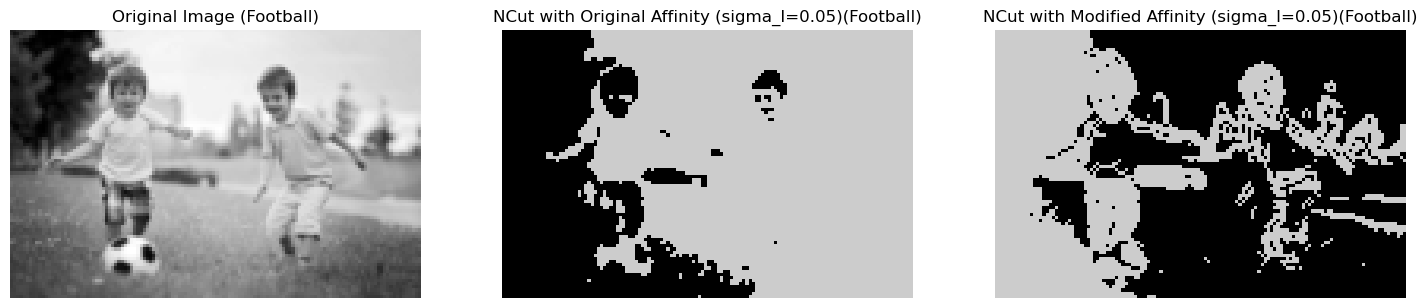

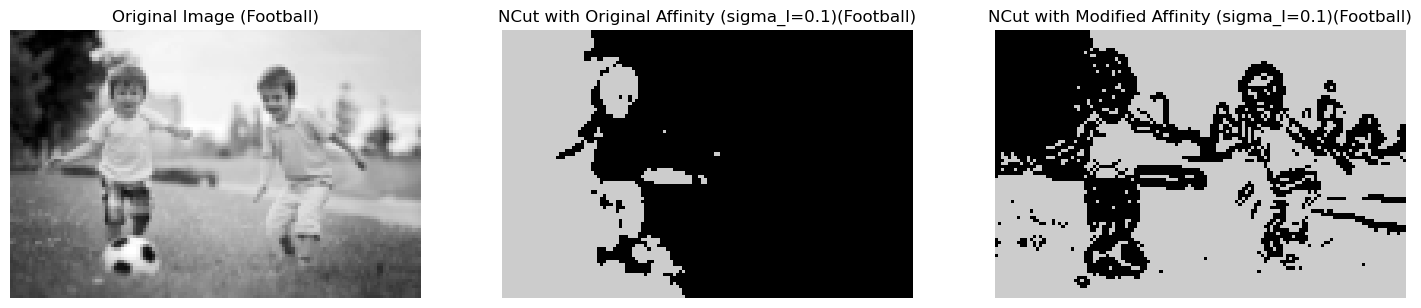

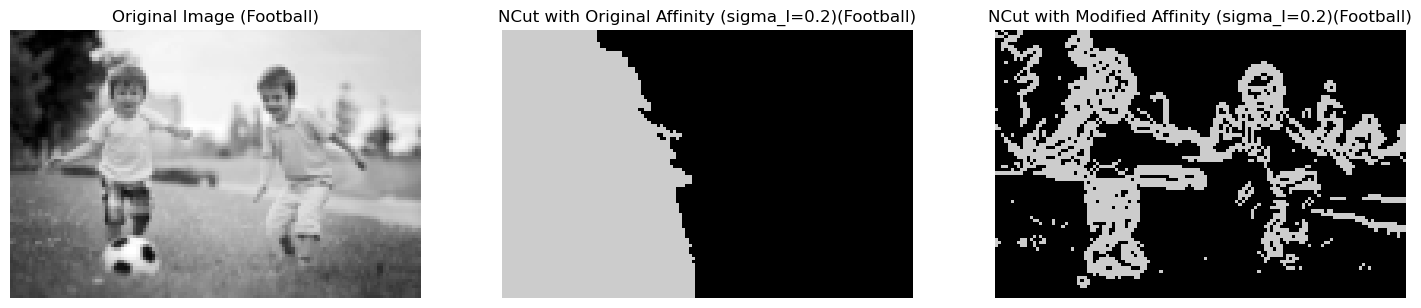

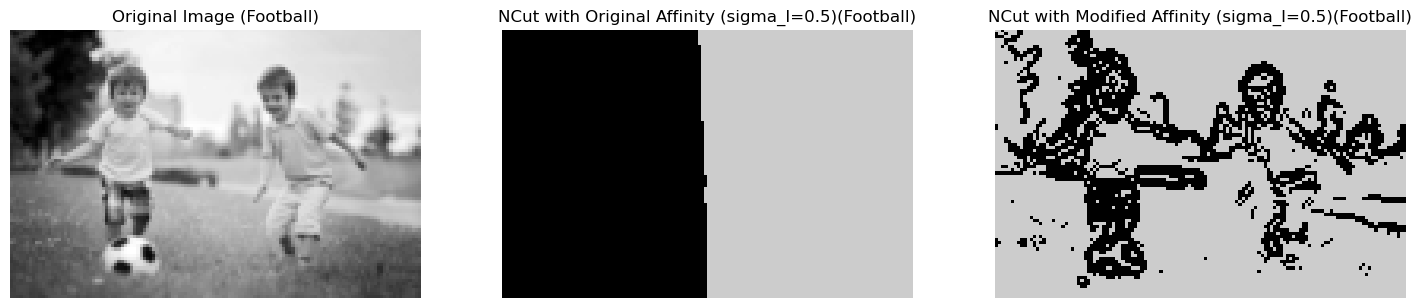

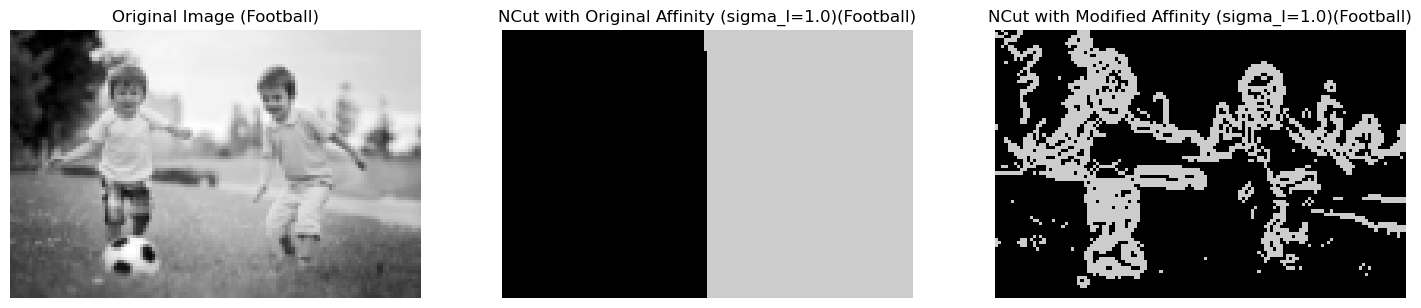

In [22]:
sigma_x = [1.0, 5.0, 10.0, 15.0, 20.0]
sigma_i = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]

sigma_E = 0.01
sigma_X = 15.0
sigma_I = 0.1

#Fix sigma_E and sigmaX and vary sigma_I
for image in [zebra_small, football_small]:
    for sigma_i_val in sigma_i:
        W = adjacency_matrix(image, sigma_i_val, sigma_X)
        W_modified = adjacency_matrix_modified_affinity(image, sigma_i_val, sigma_X, sigma_E)

        _, labels = ncut_split(W)
        _, labels_modified = ncut_split(W_modified)

        labels = labels.reshape(image.shape[:2])
        labels_modified = labels_modified.reshape(image.shape[:2])

        plt.figure(figsize=(18, 8))
        plt.subplot(1, 3, 1)
        plt.title(f"Original Image ({'Zebra' if image is zebra_small else 'Football'})")
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.title(f"NCut with Original Affinity (sigma_I={sigma_i_val})({'Zebra' if image is zebra_small else 'Football'})")
        plt.imshow(labels, cmap='nipy_spectral')
        plt.axis('off')
        plt.subplot(1, 3, 3)    
        plt.title(f"NCut with Modified Affinity (sigma_I={sigma_i_val})({'Zebra' if image is zebra_small else 'Football'})")
        plt.imshow(labels_modified, cmap='nipy_spectral')
        plt.axis('off')
        plt.savefig(f"output/NCut_sigma_I_{sigma_i_val}_{'Zebra' if image is zebra_small else 'Football'}.png")
        plt.show()

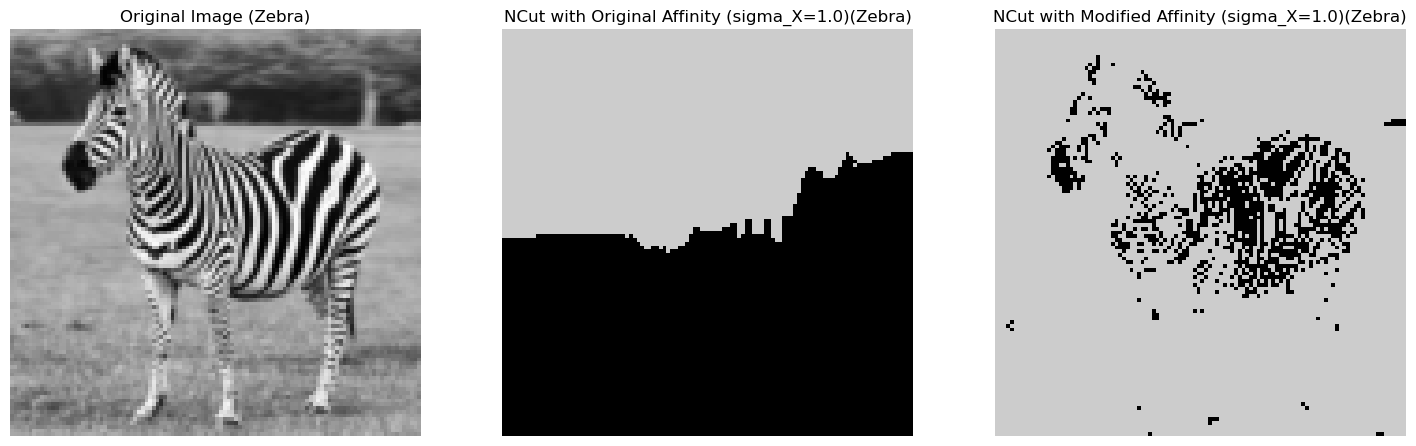

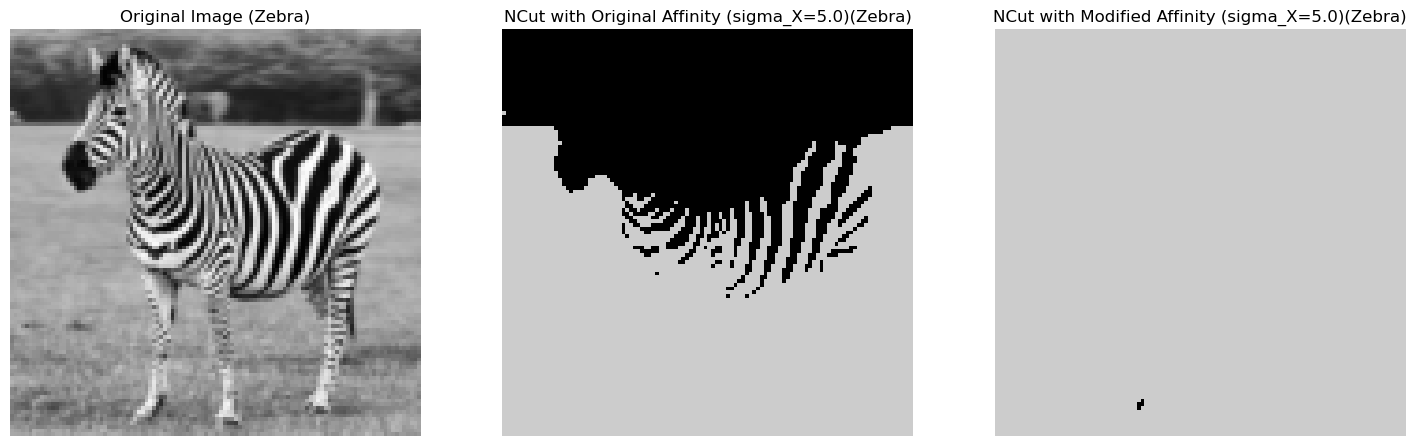

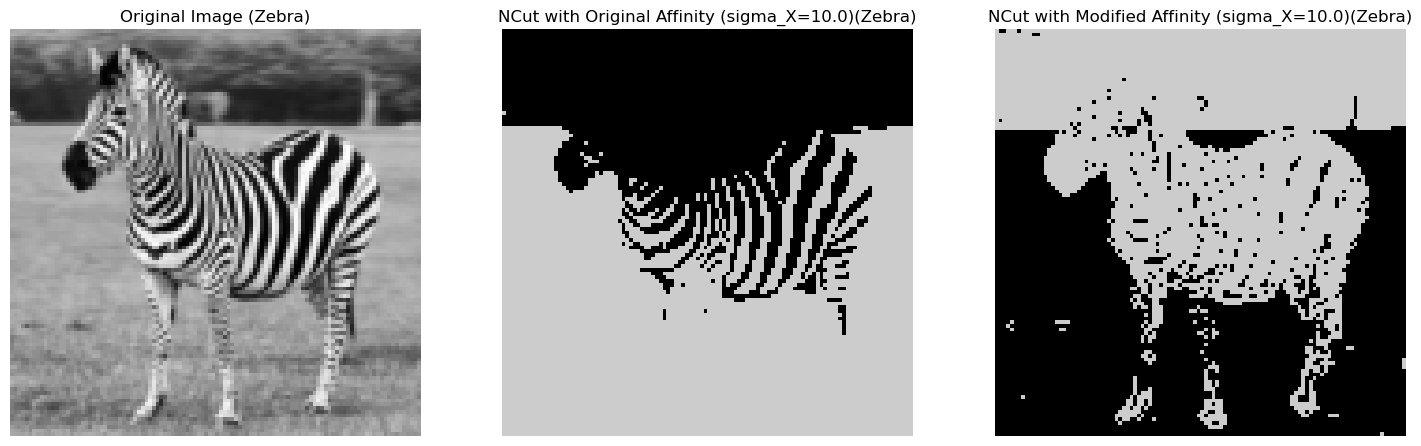

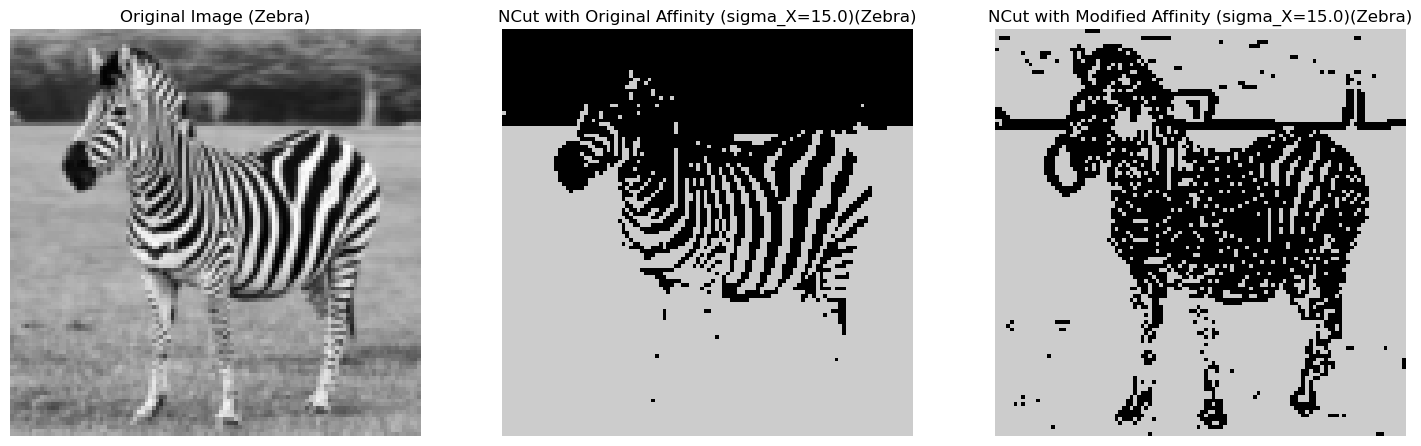

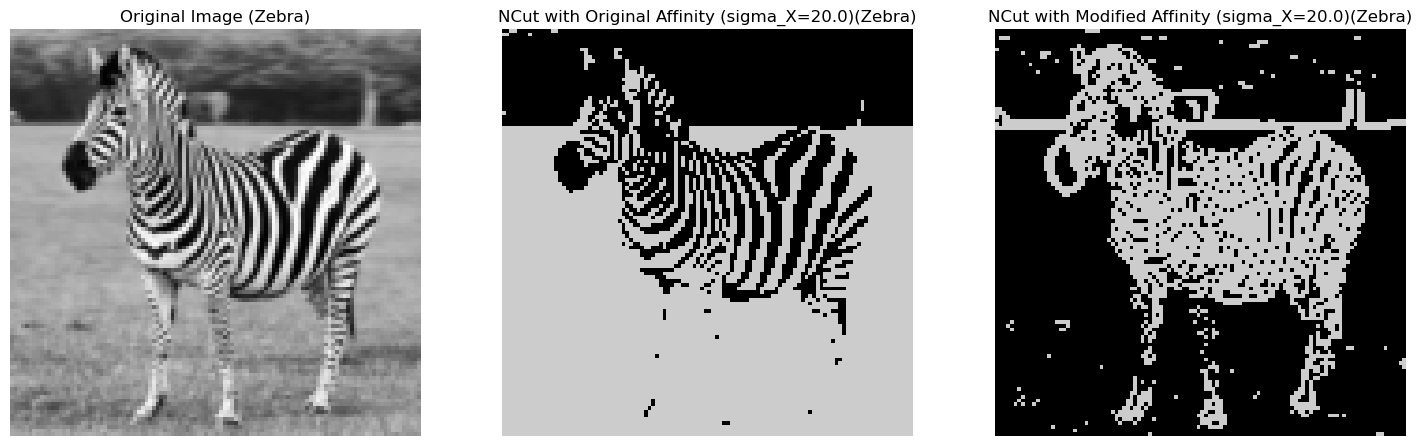

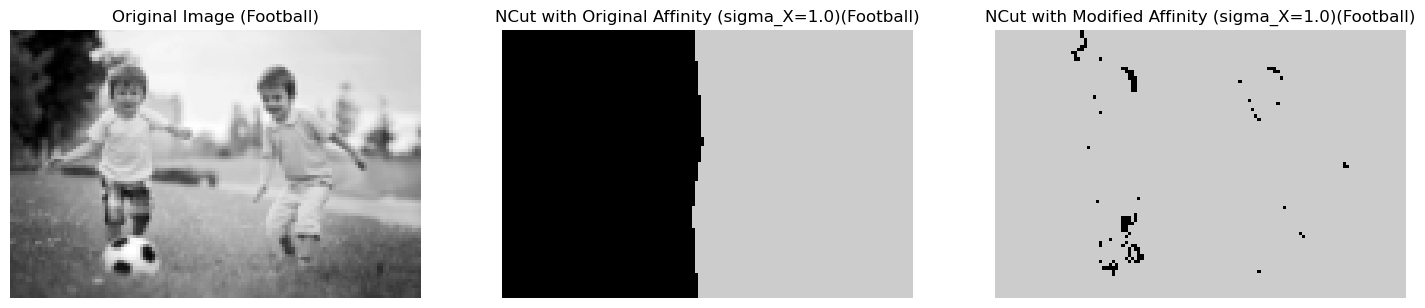

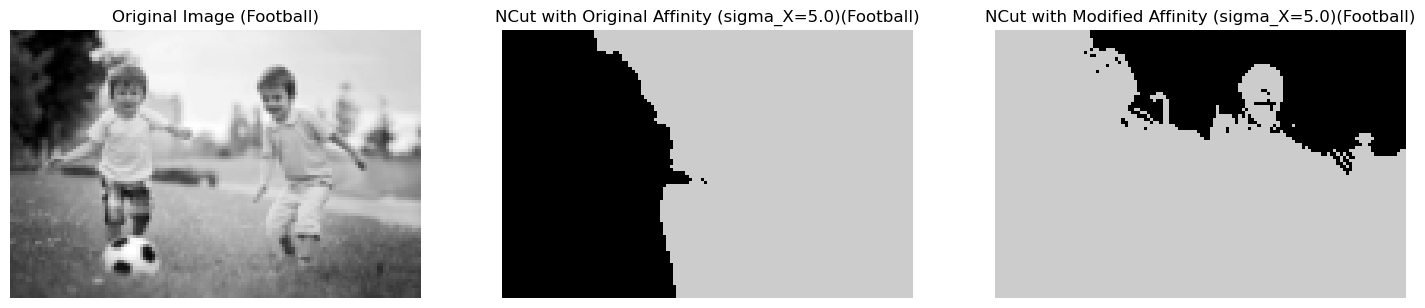

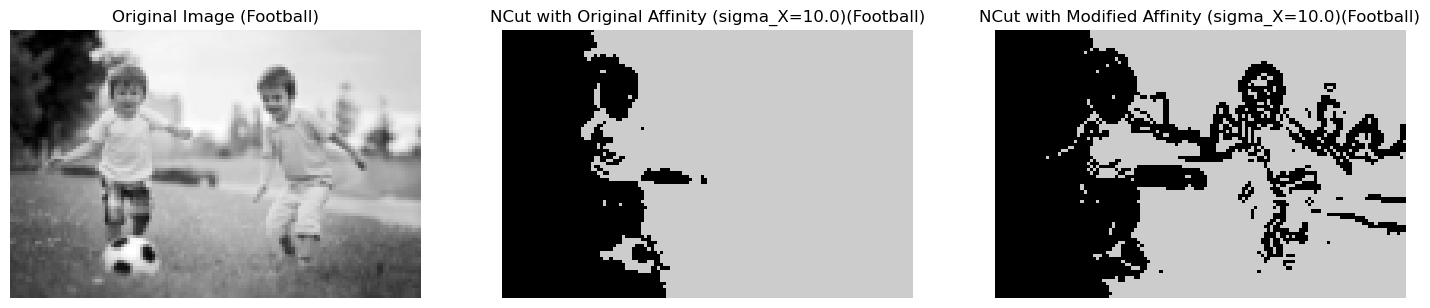

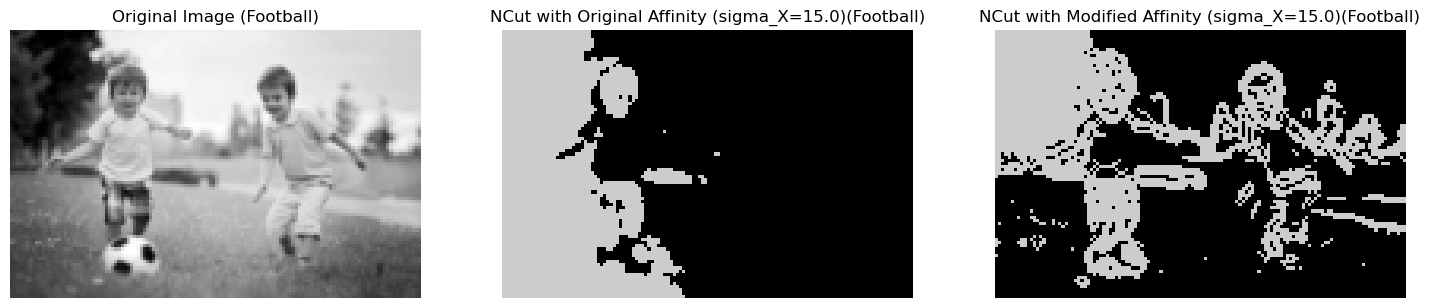

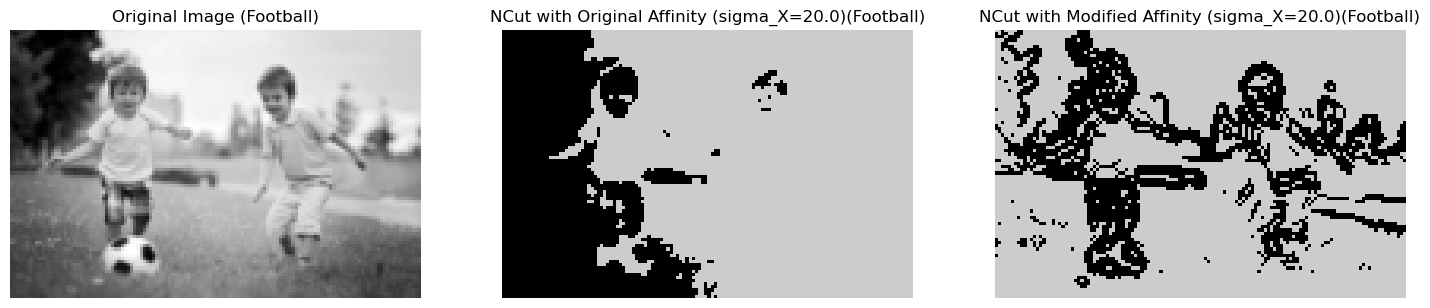

In [26]:
# Fix sigma_E and sigma_I and vary sigma_X

for image in [zebra_small, football_small]:
    for sigma_x_val in sigma_x:
        W = adjacency_matrix(image, sigma_I, sigma_x_val)
        W_modified = adjacency_matrix_modified_affinity(image, sigma_I, sigma_x_val, sigma_E)

        _, labels = ncut_split(W)
        _, labels_modified = ncut_split(W_modified)

        labels = labels.reshape(image.shape[:2])
        labels_modified = labels_modified.reshape(image.shape[:2])

        plt.figure(figsize=(18, 8))
        plt.subplot(1, 3, 1)
        plt.title(f"Original Image ({'Zebra' if image is zebra_small else 'Football'})")
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.title(f"NCut with Original Affinity (sigma_X={sigma_x_val})({'Zebra' if image is zebra_small else 'Football'})")
        plt.imshow(labels, cmap='nipy_spectral')
        plt.axis('off')
        plt.subplot(1, 3, 3)    
        plt.title(f"NCut with Modified Affinity (sigma_X={sigma_x_val})({'Zebra' if image is zebra_small else 'Football'})")
        plt.imshow(labels_modified, cmap='nipy_spectral')
        plt.axis('off')
        plt.savefig(f"output/NCut_sigma_X_{sigma_x_val}_{'Zebra' if image is zebra_small else 'Football'}.png")
        plt.show()

#### Problem 1(c)

  Segment size=  9879,  NCut=0.0071
  Segment size=  5966,  NCut=0.1479
  Segment size=  3913,  NCut=0.3632
  Segment size=  2995,  NCut=0.2912
  Segment size=  2971,  NCut=0.2841
  Segment size=  9879,  NCut=0.0000
  Segment size=  2121,  NCut=0.1213
  Segment size=  7758,  NCut=0.0013
  Segment size=  3714,  NCut=0.0754
  Segment size=  4044,  NCut=0.0028
  Segment size=  1704,  NCut=0.0003
  Segment size=  2340,  NCut=0.0045
  Segment size=  1125,  NCut=0.0164
  Segment size=   579,  NCut=0.0399
  Segment size=  1231,  NCut=0.0039
  Segment size=  1109,  NCut=0.0851
  Segment size=   523,  NCut=0.0425
  Segment size=   602,  NCut=0.0558
  Segment size=   426,  NCut=0.0586
  Segment size=   153,  NCut=0.0437
  Segment size=   493,  NCut=0.0265
  Segment size=   738,  NCut=0.0475
  Segment size=   364,  NCut=0.0308
  Segment size=   159,  NCut=0.1256
  Segment size=   309,  NCut=0.1390
  Segment size=   293,  NCut=0.2401
  Segment size=   143,  NCut=0.0487
  Segment size=   283,  NCut

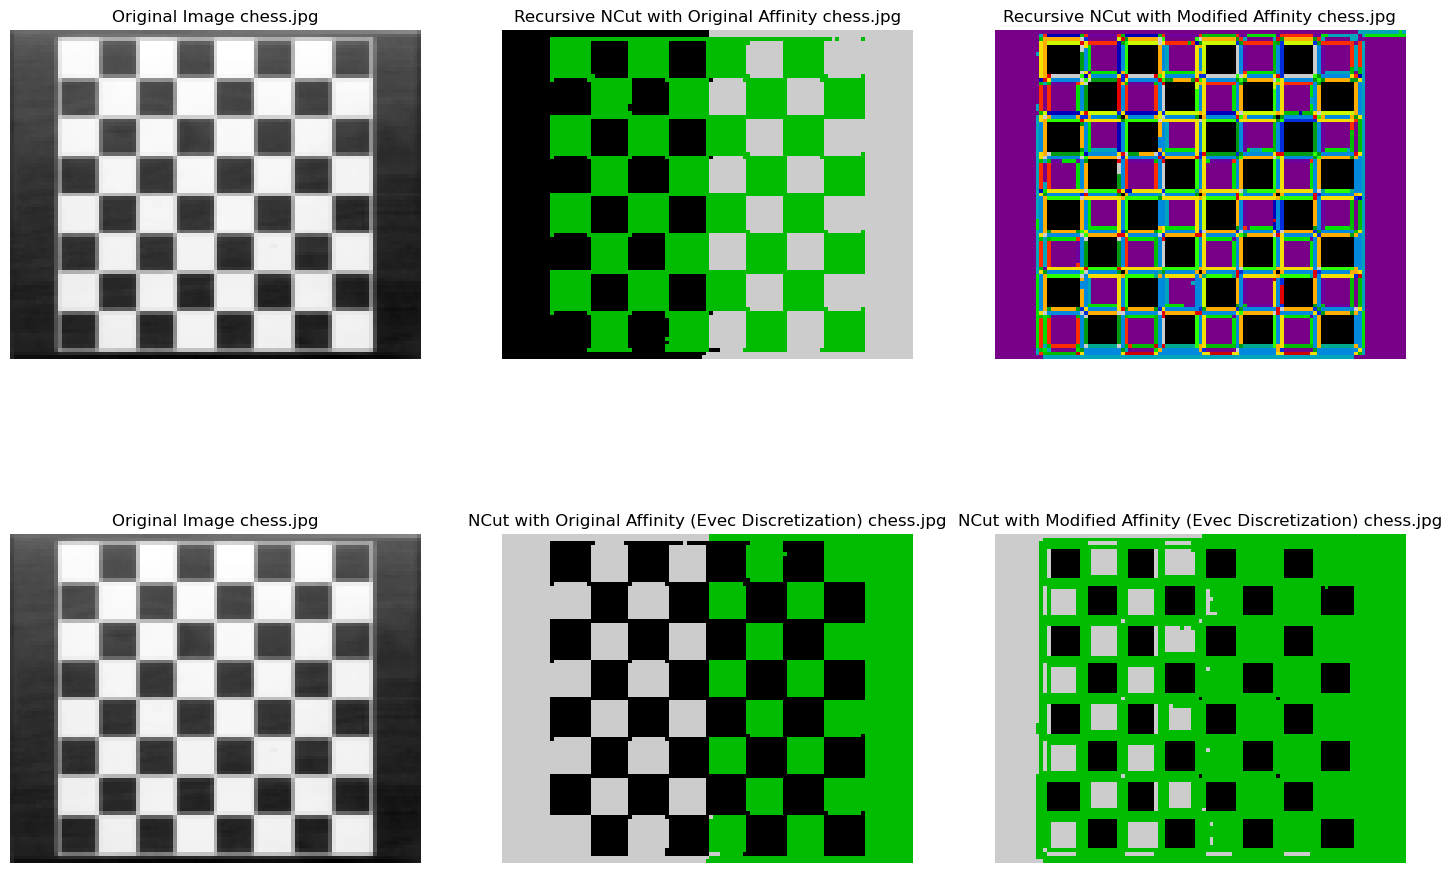

  Segment size= 11990,  NCut=0.1129
  Segment size=  7308,  NCut=0.1833
  Segment size=  4682,  NCut=0.2132
  Segment size=  3659,  NCut=0.2776
  Segment size=  3649,  NCut=0.3666
  Segment size= 11990,  NCut=0.0304
  Segment size=  8803,  NCut=0.0470
  Segment size=  3187,  NCut=0.0118
  Segment size=  5049,  NCut=0.1073
  Segment size=  3754,  NCut=0.0799
  Segment size=   974,  NCut=0.0177
  Segment size=  2213,  NCut=0.0401
  Segment size=   449,  NCut=0.0512
  Segment size=   525,  NCut=0.0630
  Segment size=  1228,  NCut=0.1031
  Segment size=   985,  NCut=0.0511
  Segment size=   190,  NCut=0.1185
  Segment size=   259,  NCut=0.0777
  Segment size=   255,  NCut=0.0727
  Segment size=   270,  NCut=0.0967
  Segment size=   482,  NCut=0.0822
  Segment size=   503,  NCut=0.1598


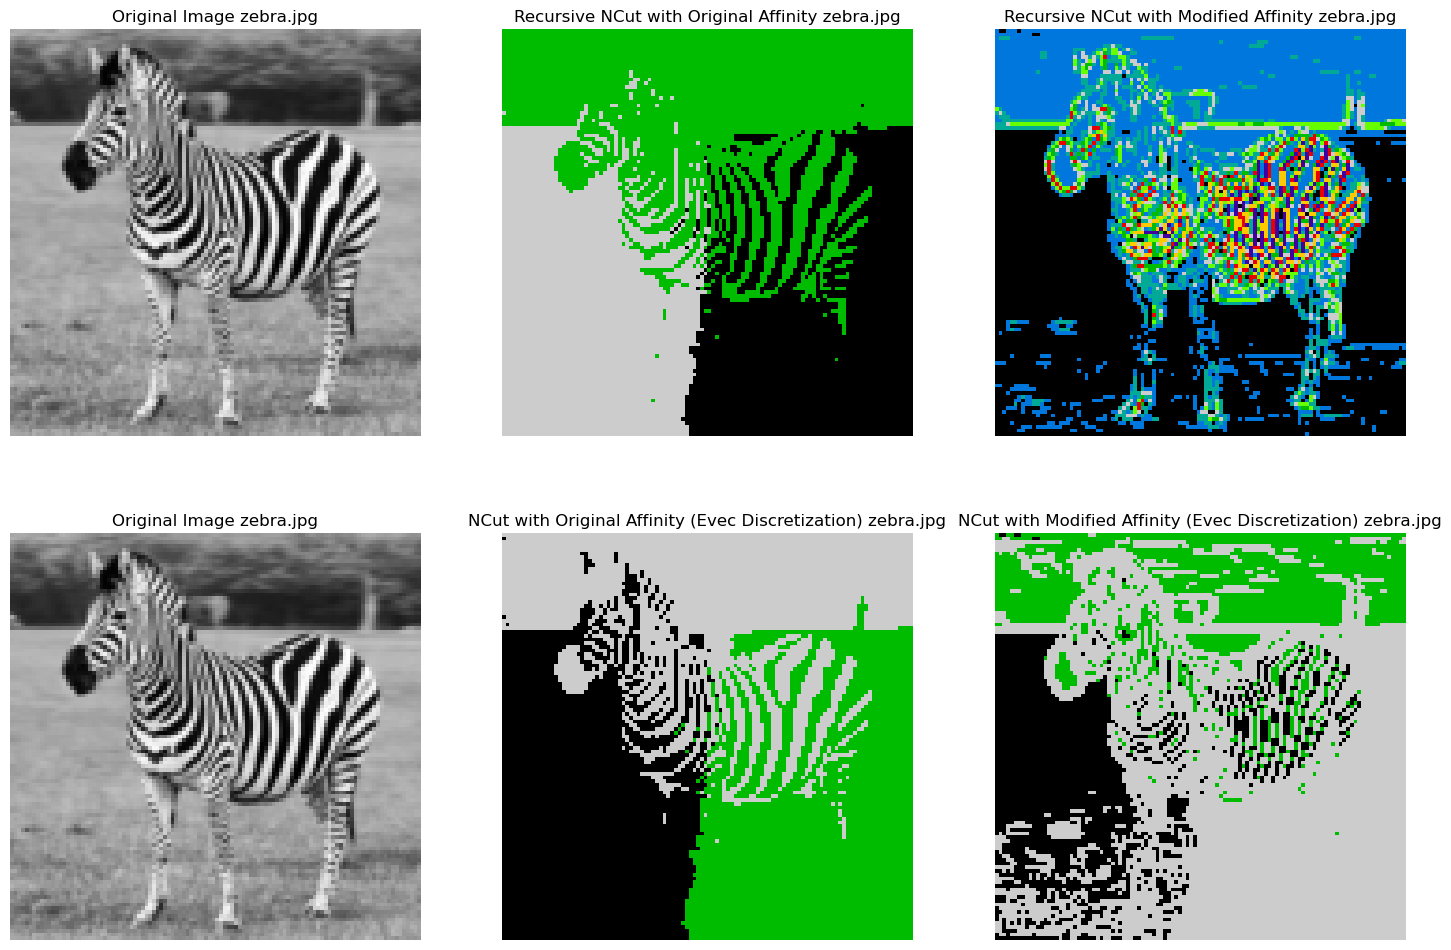

  Segment size=  6882,  NCut=0.0971
  Segment size=  1506,  NCut=0.2914
  Segment size=  5376,  NCut=0.2639
  Segment size=  6882,  NCut=0.0265
  Segment size=  3465,  NCut=0.1845
  Segment size=  3417,  NCut=0.0139
  Segment size=  2682,  NCut=0.0293
  Segment size=   735,  NCut=0.1689
  Segment size=  1079,  NCut=0.0248
  Segment size=  1603,  NCut=0.0684
  Segment size=   474,  NCut=0.0437
  Segment size=   605,  NCut=0.1074
  Segment size=   807,  NCut=0.2009
  Segment size=   796,  NCut=0.1023
  Segment size=   281,  NCut=0.0534
  Segment size=   193,  NCut=0.0247
  Segment size=   155,  NCut=0.0994
  Segment size=   126,  NCut=0.1102
  Segment size=   128,  NCut=0.0624


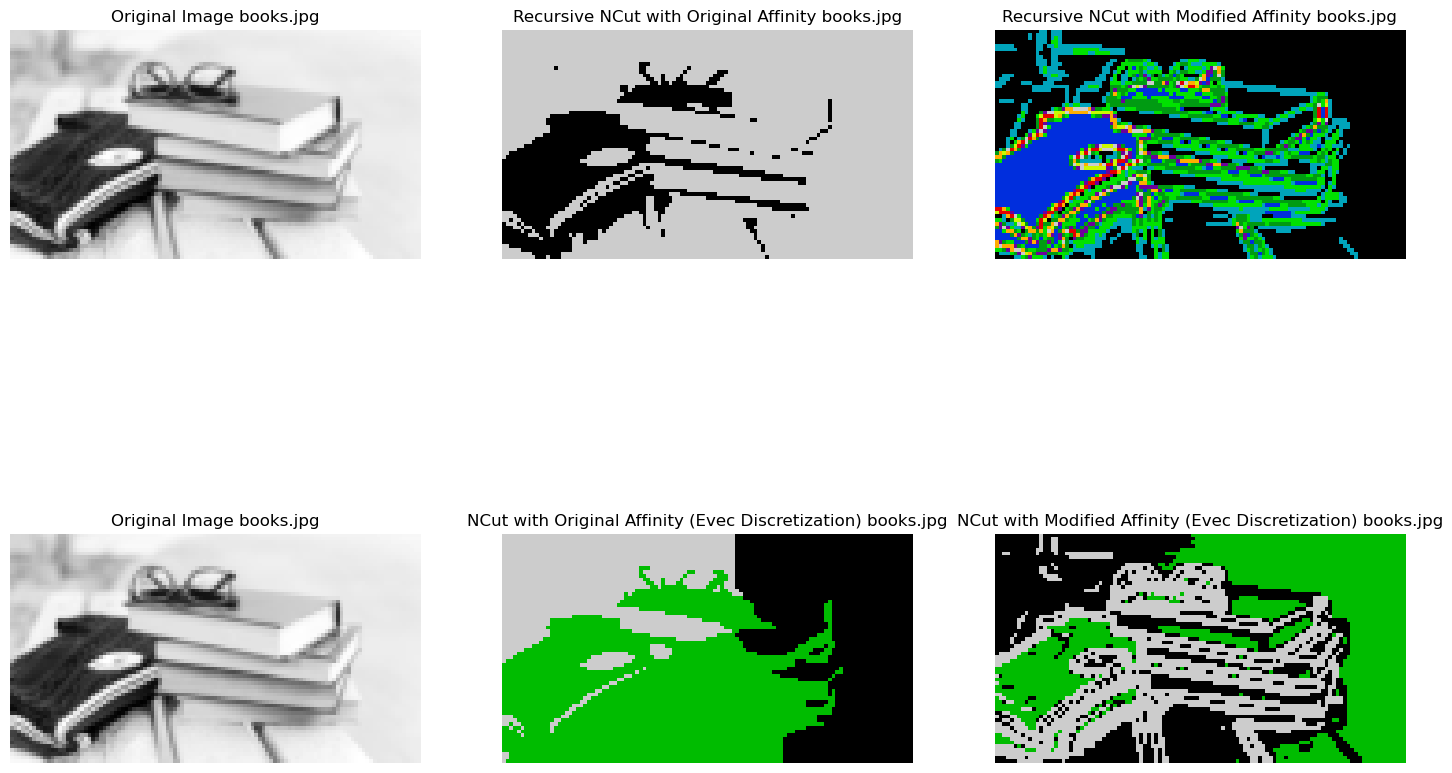

  Segment size= 11050,  NCut=0.1084
  Segment size=  7774,  NCut=0.2643
  Segment size=  3276,  NCut=0.0860
  Segment size=  1101,  NCut=0.6353
  Segment size=  2175,  NCut=0.4363
  Segment size= 11050,  NCut=0.0589
  Segment size=  8041,  NCut=0.0421
  Segment size=  3009,  NCut=0.0448
  Segment size=  2250,  NCut=0.2014
  Segment size=  5791,  NCut=0.0985
  Segment size=   676,  NCut=0.0204
  Segment size=  2333,  NCut=0.1069
  Segment size=   512,  NCut=0.0651
  Segment size=   164,  NCut=0.0037
  Segment size=   200,  NCut=0.0231
  Segment size=   312,  NCut=0.1082
  Segment size=   111,  NCut=0.1459


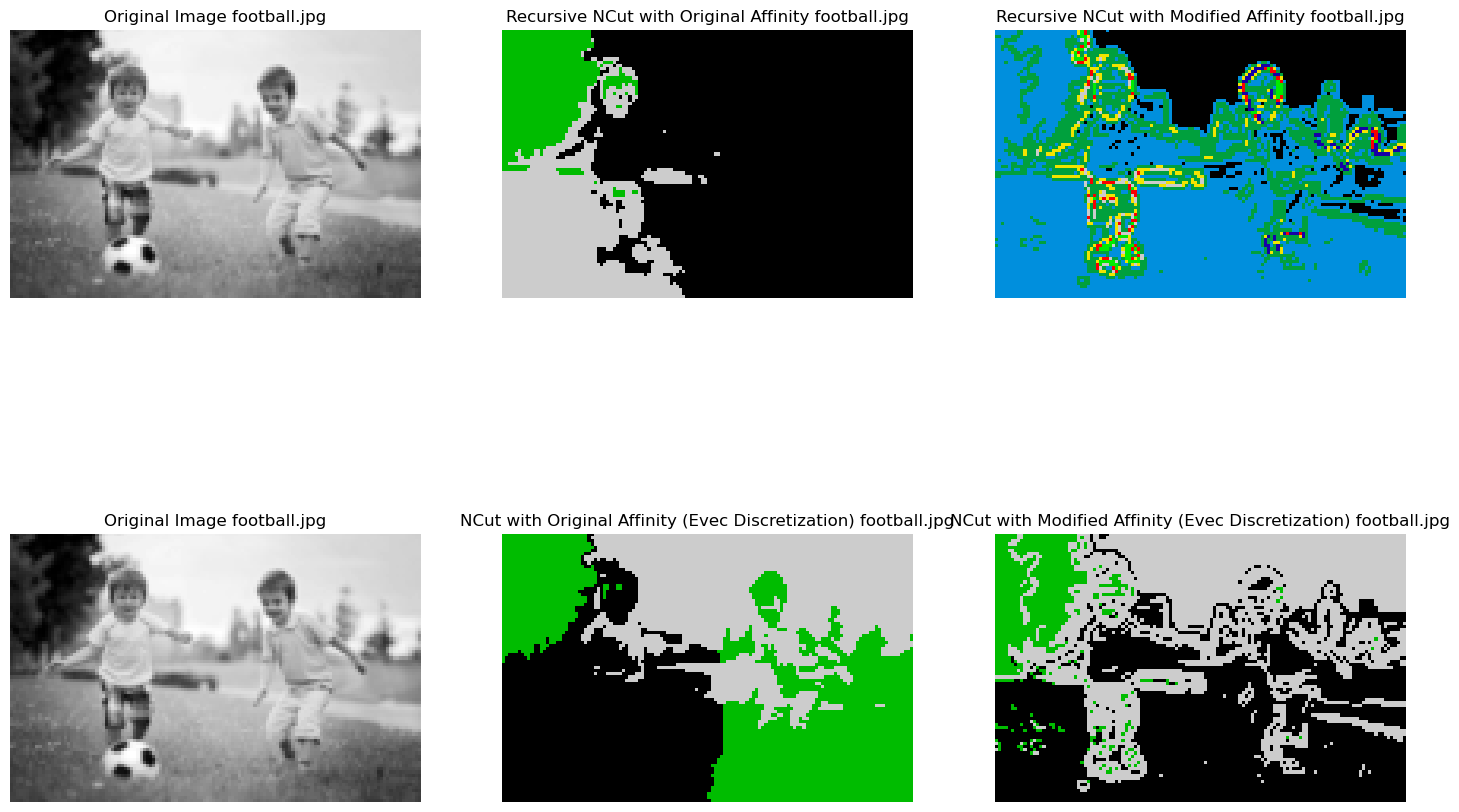

In [9]:
for item in os.listdir(os.path.join(BASE_DIR, "Data/P01")):
    image = io.imread(os.path.join(BASE_DIR, "Data/P01", item))
    image = color.rgb2gray(image)

    #Scaling the image
    scale = 0.15
    H, W_img = image.shape
    image_small = resize(image, (int(H * scale), int(W_img * scale)), anti_aliasing=True)
    
    #Hyper-parameters
    sigma_I = 0.1
    sigma_X = 15.0
    sigma_E = 0.01
    neval = 4

    W = adjacency_matrix(image_small, sigma_I, sigma_X)
    W_modified = adjacency_matrix_modified_affinity(image_small, sigma_I, sigma_X, sigma_E)

    label_map_recursive = recursive_ncut(W, image_small.shape, threshold = 0.2, min_size = 100)
    label_map_recursive_modified = recursive_ncut(W_modified, image_small.shape, threshold = 0.07, min_size = 100)

    _, evec = ncut(W, neval)
    evec_discrete = discretisation(evec[:, 1:neval])
    label_map_evalue = asarray(evec_discrete.argmax(axis=1)).reshape(image_small.shape[:2])

    _, evec = ncut(W_modified, neval)
    evec_discrete = discretisation(evec[:, 1:neval])
    label_map_evalue_modified = asarray(evec_discrete.argmax(axis=1)).reshape(image_small.shape[:2])

    plt.figure(figsize=(18, 12))
    plt.subplot(2, 3, 1)
    plt.title(f"Original Image {item}")
    plt.imshow(image_small, cmap='gray')
    plt.axis('off')
    plt.subplot(2, 3, 2)
    plt.title(f"Recursive NCut with Original Affinity {item}")
    plt.imshow(label_map_recursive, cmap='nipy_spectral')
    plt.axis('off')
    plt.subplot(2, 3, 3)
    plt.title(f"Recursive NCut with Modified Affinity {item}")
    plt.imshow(label_map_recursive_modified, cmap='nipy_spectral')
    plt.axis('off')
    plt.subplot(2, 3, 4)
    plt.title(f"Original Image {item}")
    plt.imshow(image_small, cmap='gray')
    plt.axis('off')
    plt.subplot(2, 3, 5)
    plt.title(f"NCut with Original Affinity (Evec Discretization) {item}")
    plt.imshow(label_map_evalue, cmap='nipy_spectral')
    plt.axis('off')
    plt.subplot(2, 3, 6)
    plt.title(f"NCut with Modified Affinity (Evec Discretization) {item}")
    plt.imshow(label_map_evalue_modified, cmap='nipy_spectral')
    plt.axis('off')
    plt.savefig(f"output/P01c_{item}_multi_cut_comparison.png")
    plt.show()


### Problem 2: Semantic Segmentation with Different Decoder Designs

Train :  394 images  (99 batches)
Test  :  102 images  (26 batches)

Sample image shape : torch.Size([3, 512, 512])  dtype=torch.float32
Sample mask  shape : torch.Size([512, 512])  dtype=torch.int64
Unique mask labels : [0, 1]
Person pixel ratio : 0.021


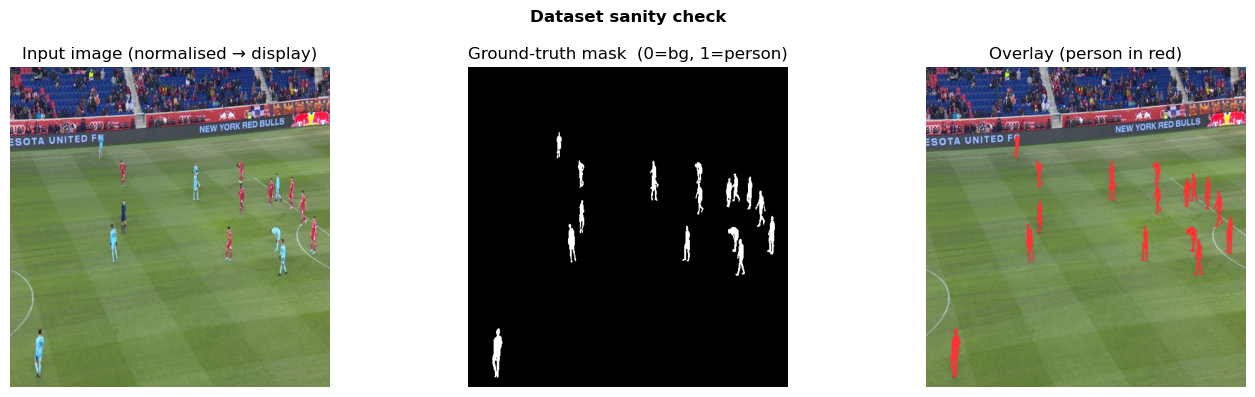

In [2]:

# Paths 
BASE_DIR   = os.path.join(os.path.expanduser("~"), "Downloads", "Notes and Books",
                          "IISc Coding Assignments and Project",
                          "E9-246-Advanced-Image-Processing", "Assignment_2")
P02_DIR    = os.path.join(BASE_DIR, "Data", "P02")
IMG_DIR    = os.path.join(P02_DIR, "images")
ANN_FILE   = os.path.join(P02_DIR, "annotations", "instances_default.json")
SPLIT_FILE = os.path.join(P02_DIR, "train_test_split.json")

#  Hyper-parameters 
IMG_SIZE    = 512  
BATCH_SIZE  = 4     
NUM_CLASSES = 2     

NUM_WORKERS = 0

# Build datasets & loaders
train_dataset = PersonSegDataset(IMG_DIR, ANN_FILE, SPLIT_FILE,
                                 split='train', img_size=IMG_SIZE)
test_dataset  = PersonSegDataset(IMG_DIR, ANN_FILE, SPLIT_FILE,
                                 split='test',  img_size=IMG_SIZE)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=NUM_WORKERS, pin_memory=False)
test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=NUM_WORKERS, pin_memory=False)

print(f"Train : {len(train_dataset):4d} images  ({len(train_loader)} batches)")
print(f"Test  : {len(test_dataset):4d} images  ({len(test_loader)} batches)")

# Quick sanity-check: visualise one sample
def denorm(t: torch.Tensor) -> np.ndarray:
    """Reverse ImageNet normalisation for display."""
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std  = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return (t * std + mean).clamp(0, 1).permute(1, 2, 0).numpy()

img_sample, mask_sample = train_dataset[0]
print(f"\nSample image shape : {img_sample.shape}  dtype={img_sample.dtype}")
print(f"Sample mask  shape : {mask_sample.shape}  dtype={mask_sample.dtype}")
print(f"Unique mask labels : {mask_sample.unique().tolist()}")
print(f"Person pixel ratio : {(mask_sample == 1).float().mean():.3f}")

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
axes[0].imshow(denorm(img_sample))
axes[0].set_title('Input image (normalised → display)')
axes[0].axis('off')
axes[1].imshow(mask_sample.numpy(), cmap='gray', vmin=0, vmax=1)
axes[1].set_title('Ground-truth mask  (0=bg, 1=person)')
axes[1].axis('off')
# overlay mask on image
overlay = denorm(img_sample).copy()
overlay[mask_sample.numpy() == 1] = [1.0, 0.2, 0.2]   # tint persons red
axes[2].imshow(overlay)
axes[2].set_title('Overlay (person in red)')
axes[2].axis('off')
plt.suptitle('Dataset sanity check', fontweight='bold')
plt.tight_layout()
plt.show()


#### Problem 2(a): FCN-32s — Single-Stage Decoder

In [3]:
model_2a = FCN32s(num_classes=NUM_CLASSES, pretrained=True).to(device)

# Dry-run to verify shapes
with torch.no_grad():
    dummy = torch.zeros(1, 3, IMG_SIZE, IMG_SIZE, device=device)
    out   = model_2a(dummy)
    print("FCN-32s architecture")
    print(f"  Input  : {list(dummy.shape)}")
    print(f"  Output : {list(out.shape)}  ← same spatial size as input ✓")

total_params     = sum(p.numel() for p in model_2a.parameters())
trainable_params = sum(p.numel() for p in model_2a.parameters() if p.requires_grad)
print(f"\n  Total parameters     : {total_params:,}")
print(f"  Trainable parameters : {trainable_params:,}")


FCN-32s architecture
  Input  : [1, 3, 512, 512]
  Output : [1, 2, 512, 512]  ← same spatial size as input ✓

  Total parameters     : 11,185,730
  Trainable parameters : 11,185,730


In [ ]:
# Hyper-parameters
NUM_EPOCHS   = 15
LR           = 1e-2
MOMENTUM     = 0.9
WEIGHT_DECAY = 1e-2
LR_STEP      = 5
LR_GAMMA     = 0.1
SAVE_PATH    = os.path.join(BASE_DIR, "fcn32s_best.pth")

# Model, optimiser, scheduler 
model_2a  = FCN32s(num_classes=NUM_CLASSES, pretrained=True).to(device)

optimizer = optim.AdamW(model_2a.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=LR_STEP, gamma=LR_GAMMA)

# Training loop
history_fcn32s = {
    'train_loss': [],
    'pixel_acc' : [],
    'miou'      : [],
}
best_loss = float('inf')

print(f"{'Epoch':>5}  {'Train Loss':>10}  {'Pixel Acc':>10}  {'mIoU':>8}  {'LR':>10}")
print("─" * 54)

for epoch in range(1, NUM_EPOCHS + 1):

    train_loss, pixel_acc, miou, _ = evaluate(
        model_2a, train_loader, None, device, NUM_CLASSES,
        train_mode=True, optimizer=optimizer)

    scheduler.step()
    current_lr = scheduler.get_last_lr()[0]

    history_fcn32s['train_loss'].append(train_loss)
    history_fcn32s['pixel_acc' ].append(pixel_acc)
    history_fcn32s['miou'      ].append(miou)

    # save best checkpoint (based on train loss)
    if train_loss < best_loss:
        best_loss = train_loss
        torch.save(model_2a.state_dict(), SAVE_PATH)
        star = " ★"
    else:
        star = ""

    print(f"{epoch:5d}  {train_loss:10.4f}  {pixel_acc:10.4f}  {miou:8.4f}  {current_lr:10.6f}{star}")

print(f"\nBest train loss: {best_loss:.4f}  (checkpoint saved → {SAVE_PATH})")


Epoch  Train Loss   Pixel Acc      mIoU          LR
──────────────────────────────────────────────────────


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    1      0.9139      0.4150    0.2157    0.010000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    2      0.5510      0.9728    0.6317    0.010000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    3      0.5075      0.9763    0.6527    0.010000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    4      0.4970      0.9768    0.6576    0.010000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    5      0.4929      0.9773    0.6596    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    6      0.4900      0.9775    0.6612    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    7      0.4854      0.9779    0.6635    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    8      0.4840      0.9780    0.6642    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    9      0.4824      0.9782    0.6650    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   10      0.4817      0.9782    0.6653    0.000100 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   11      0.4801      0.9783    0.6661    0.000100 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   12      0.4796      0.9783    0.6662    0.000100 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   13      0.4795      0.9783    0.6663    0.000100 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   14      0.4792      0.9784    0.6665    0.000100 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   15      0.4790      0.9783    0.6666    0.000010 ★

Best train loss: 0.4790  (checkpoint saved → /Users/dwaipayanhaldar/Downloads/Notes and Books/IISc Coding Assignments and Project/E9-246-Advanced-Image-Processing/Assignment_2/fcn32s_best.pth)


  eval :   0%|          | 0/26 [00:00<?, ?it/s]

  FCN-32s  ·  Problem 2(a) — Test-set results
  Pixel Accuracy : 0.9778  (97.78 %)
  Mean IoU       : 0.6650  (66.50 %)

  Per-class IoU:
    [0] background   : 0.9776
    [1] person       : 0.3524

  Confusion matrix  (rows=GT, cols=Pred):
                  background        person
  background      25,823,429       409,989
  person             182,738       322,532


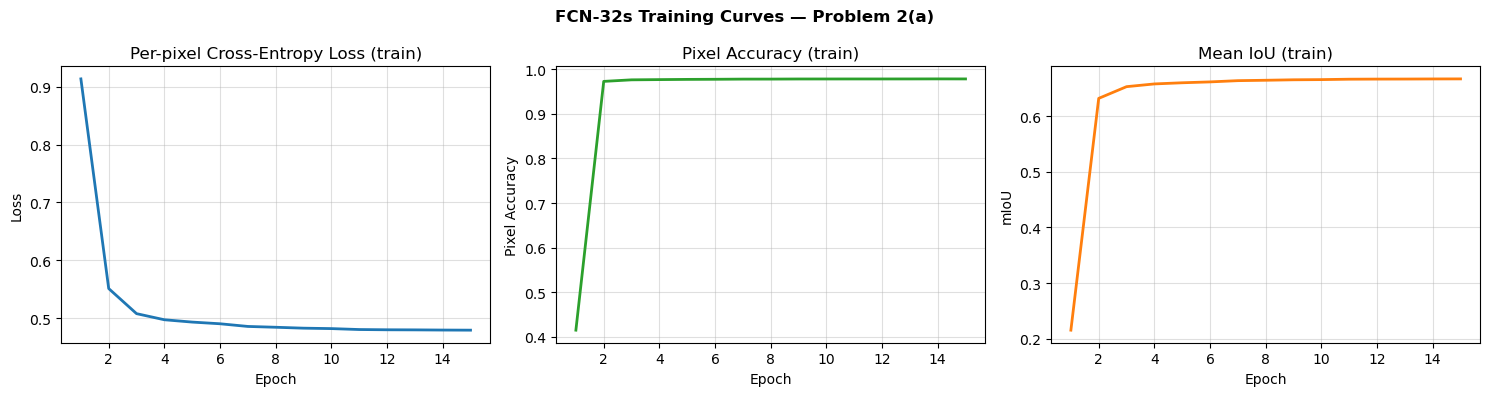

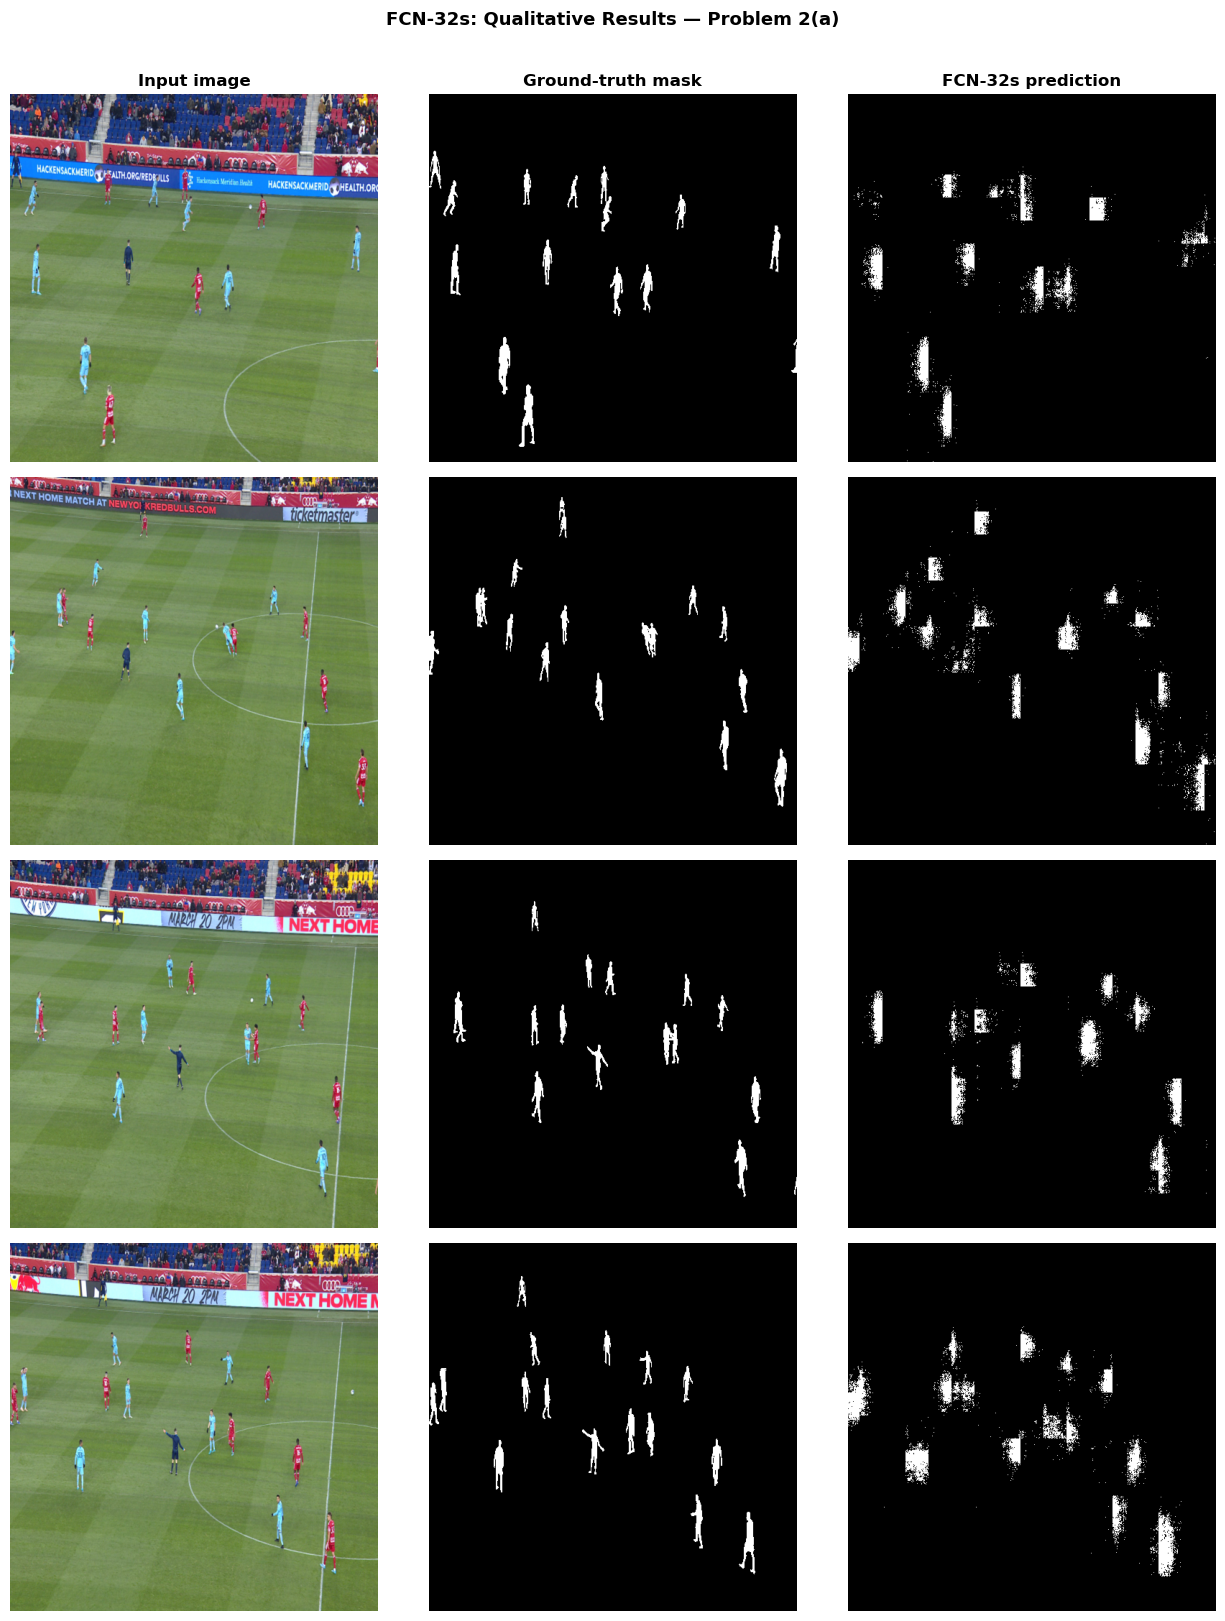

In [8]:
# 1. Load best checkpoint and evaluate on test set 
SAVE_PATH    = os.path.join(BASE_DIR, "fcn32s_best.pth")
model_2a.load_state_dict(torch.load(SAVE_PATH, map_location=device))

_, final_acc, final_miou, final_conf = evaluate(
    model_2a, test_loader, device, NUM_CLASSES)

class_names = ['background', 'person']
print("=" * 50)
print("  FCN-32s  ·  Problem 2(a) — Test-set results")
print("=" * 50)
print(f"  Pixel Accuracy : {final_acc:.4f}  ({final_acc*100:.2f} %)")
print(f"  Mean IoU       : {final_miou:.4f}  ({final_miou*100:.2f} %)")
print()
print("  Per-class IoU:")
for c, name in enumerate(class_names):
    tp    = final_conf[c, c]
    denom = final_conf[c, :].sum() + final_conf[:, c].sum() - tp
    print(f"    [{c}] {name:<12} : {tp/denom:.4f}" if denom > 0 else f"    [{c}] {name:<12} : N/A")
print()
print("  Confusion matrix  (rows=GT, cols=Pred):")
print(f"  {'':12s}", end='')
for name in class_names:
    print(f"  {name:>12}", end='')
print()
for r, rname in enumerate(class_names):
    print(f"  {rname:<12}", end='')
    for c in range(len(class_names)):
        print(f"  {final_conf[r, c]:>12,}", end='')
    print()

# 2. Training curves 
epochs = range(1, len(history_fcn32s['train_loss']) + 1)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('FCN-32s Training Curves — Problem 2(a)', fontweight='bold')

axes[0].plot(epochs, history_fcn32s['train_loss'], color='tab:blue', linewidth=2)
axes[0].set_xlabel('Epoch'); axes[0].set_ylabel('Loss')
axes[0].set_title('Per-pixel Cross-Entropy Loss (train)')
axes[0].grid(True, alpha=0.4)

axes[1].plot(epochs, history_fcn32s['pixel_acc'], color='tab:green', linewidth=2)
axes[1].set_xlabel('Epoch'); axes[1].set_ylabel('Pixel Accuracy')
axes[1].set_title('Pixel Accuracy (train)')
axes[1].grid(True, alpha=0.4)

axes[2].plot(epochs, history_fcn32s['miou'], color='tab:orange', linewidth=2)
axes[2].set_xlabel('Epoch'); axes[2].set_ylabel('mIoU')
axes[2].set_title('Mean IoU (train)')
axes[2].grid(True, alpha=0.4)

plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'fcn32s_training_curves.png'), dpi=150)
plt.show()

# 3. Qualitative predictions 
N_VIS = 4
fig, axes = plt.subplots(N_VIS, 3, figsize=(13, 4 * N_VIS))
col_titles = ['Input image', 'Ground-truth mask', 'FCN-32s prediction']
for col, title in enumerate(col_titles):
    axes[0, col].set_title(title, fontsize=12, fontweight='bold')

vis_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
model_2a.eval()
with torch.no_grad():
    for i, (img, mask) in enumerate(vis_loader):
        if i >= N_VIS:
            break
        pred    = model_2a(img.to(device)).argmax(dim=1).squeeze(0).cpu().numpy()
        img_np  = denorm(img.squeeze(0))
        mask_np = mask.squeeze(0).numpy()

        axes[i, 0].imshow(img_np);                             axes[i, 0].axis('off')
        axes[i, 1].imshow(mask_np, cmap='gray', vmin=0, vmax=1); axes[i, 1].axis('off')
        axes[i, 2].imshow(pred,    cmap='gray', vmin=0, vmax=1); axes[i, 2].axis('off')

plt.suptitle('FCN-32s: Qualitative Results — Problem 2(a)',
             fontsize=13, fontweight='bold', y=1.01)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'fcn32s_qualitative.png'), dpi=150, bbox_inches='tight')
plt.show()


#### Problem 2(b): FCN-8s — Multi-Stage Decoder

In [9]:
model_2b = FCN8s(num_classes=NUM_CLASSES, pretrained=True).to(device)

with torch.no_grad():
    dummy = torch.zeros(1, 3, IMG_SIZE, IMG_SIZE, device=device)
    out   = model_2b(dummy)
    print("FCN-8s architecture")
    print(f"  Input  : {list(dummy.shape)}")
    print(f"  Output : {list(out.shape)}  ← same spatial size as input ✓")

total_params     = sum(p.numel() for p in model_2b.parameters())
trainable_params = sum(p.numel() for p in model_2b.parameters() if p.requires_grad)
print(f"\n  Total parameters     : {total_params:,}")
print(f"  Trainable parameters : {trainable_params:,}")


FCN-8s architecture
  Input  : [1, 3, 512, 512]
  Output : [1, 2, 512, 512]  ← same spatial size as input ✓

  Total parameters     : 11,178,886
  Trainable parameters : 11,178,886


In [23]:

# ─────────────────────────────────────────────────────────────────────────────
# Training: Problem 2(b) — FCN-8s
# ─────────────────────────────────────────────────────────────────────────────

# ── Hyper-parameters ──────────────────────────────────────────────────────────
NUM_EPOCHS_8s   = 20
LR_8s           = 1e-3
MOMENTUM_8s     = 0.9
WEIGHT_DECAY_8s = 1e-2
LR_STEP_8s      = 15
LR_GAMMA_8s     = 0.1
SAVE_PATH_8s    = os.path.join(BASE_DIR, "fcn8s_best.pth")

# ── Model, optimiser, scheduler ───────────────────────────────────────────────
model_2b  = FCN8s(num_classes=NUM_CLASSES, pretrained=True).to(device)

optimizer_8s = optim.AdamW(model_2b.parameters(), lr=LR_8s, weight_decay=WEIGHT_DECAY_8s)

scheduler_8s = optim.lr_scheduler.StepLR(optimizer_8s,
                                          step_size=LR_STEP_8s,
                                          gamma=LR_GAMMA_8s)

# ── Training loop ─────────────────────────────────────────────────────────────
history_8s = {
    'train_loss': [],
    'pixel_acc' : [],
    'miou'      : [],
}
best_loss_8s = float('inf')

print(f"{'Epoch':>5}  {'Train Loss':>10}  {'Pixel Acc':>10}  {'mIoU':>8}  {'LR':>10}")
print("─" * 54)

for epoch in range(1, NUM_EPOCHS_8s + 1):

    train_loss, pixel_acc, miou, _ = evaluate(
        model_2b, train_loader, None, device, NUM_CLASSES,
        train_mode=True, optimizer=optimizer_8s)

    scheduler_8s.step()
    current_lr = scheduler_8s.get_last_lr()[0]

    history_8s['train_loss'].append(train_loss)
    history_8s['pixel_acc' ].append(pixel_acc)
    history_8s['miou'      ].append(miou)

    if train_loss < best_loss_8s:
        best_loss_8s = train_loss
        torch.save(model_2b.state_dict(), SAVE_PATH_8s)
        star = " ★"
    else:
        star = ""

    print(f"{epoch:5d}  {train_loss:10.4f}  {pixel_acc:10.4f}  {miou:8.4f}  {current_lr:10.6f}{star}")

print(f"\nBest train loss: {best_loss_8s:.4f}  (checkpoint saved → {SAVE_PATH_8s})")


Epoch  Train Loss   Pixel Acc      mIoU          LR
──────────────────────────────────────────────────────


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    1      0.3530      0.9673    0.6363    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    2      0.1939      0.9928    0.8423    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    3      0.1696      0.9937    0.8579    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    4      0.1542      0.9943    0.8690    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    5      0.1476      0.9945    0.8734    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    6      0.1409      0.9948    0.8782    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    7      0.1368      0.9949    0.8811    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    8      0.1313      0.9952    0.8854    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

    9      0.1288      0.9952    0.8872    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   10      0.1228      0.9955    0.8921    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   11      0.1177      0.9957    0.8962    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   12      0.1137      0.9958    0.8993    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   13      0.1112      0.9959    0.9013    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   14      0.1069      0.9961    0.9047    0.001000 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   15      0.1051      0.9961    0.9062    0.000100 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   16      0.0996      0.9964    0.9110    0.000100 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   17      0.0978      0.9964    0.9126    0.000100 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   18      0.0970      0.9965    0.9133    0.000100 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   19      0.0963      0.9965    0.9139    0.000100 ★


  train:   0%|          | 0/99 [00:00<?, ?it/s]

   20      0.0957      0.9965    0.9146    0.000100 ★

Best train loss: 0.0957  (checkpoint saved → /Users/dwaipayanhaldar/Downloads/Notes and Books/IISc Coding Assignments and Project/E9-246-Advanced-Image-Processing/Assignment_2/fcn8s_best.pth)


  eval :   0%|          | 0/26 [00:00<?, ?it/s]

  FCN-8s  ·  Problem 2(b) — Test-set results
  Pixel Accuracy : 0.9960  (99.60 %)
  Mean IoU       : 0.9056  (90.56 %)

  Per-class IoU:
    [0] background   : 0.9960
    [1] person       : 0.8152

  Confusion matrix  (rows=GT, cols=Pred):
                  background        person
  background      26,163,741        69,677
  person              36,588       468,682


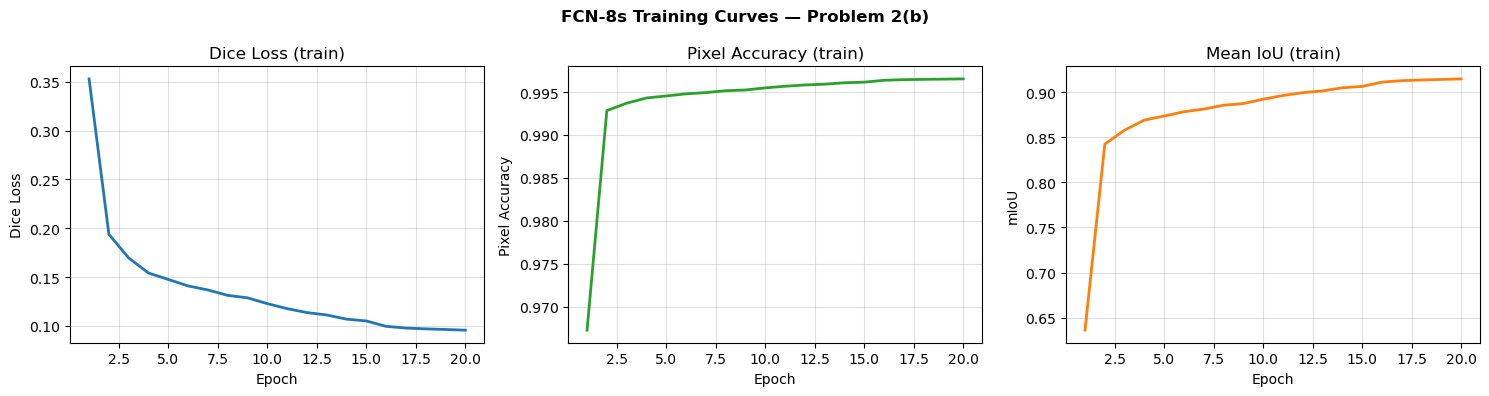

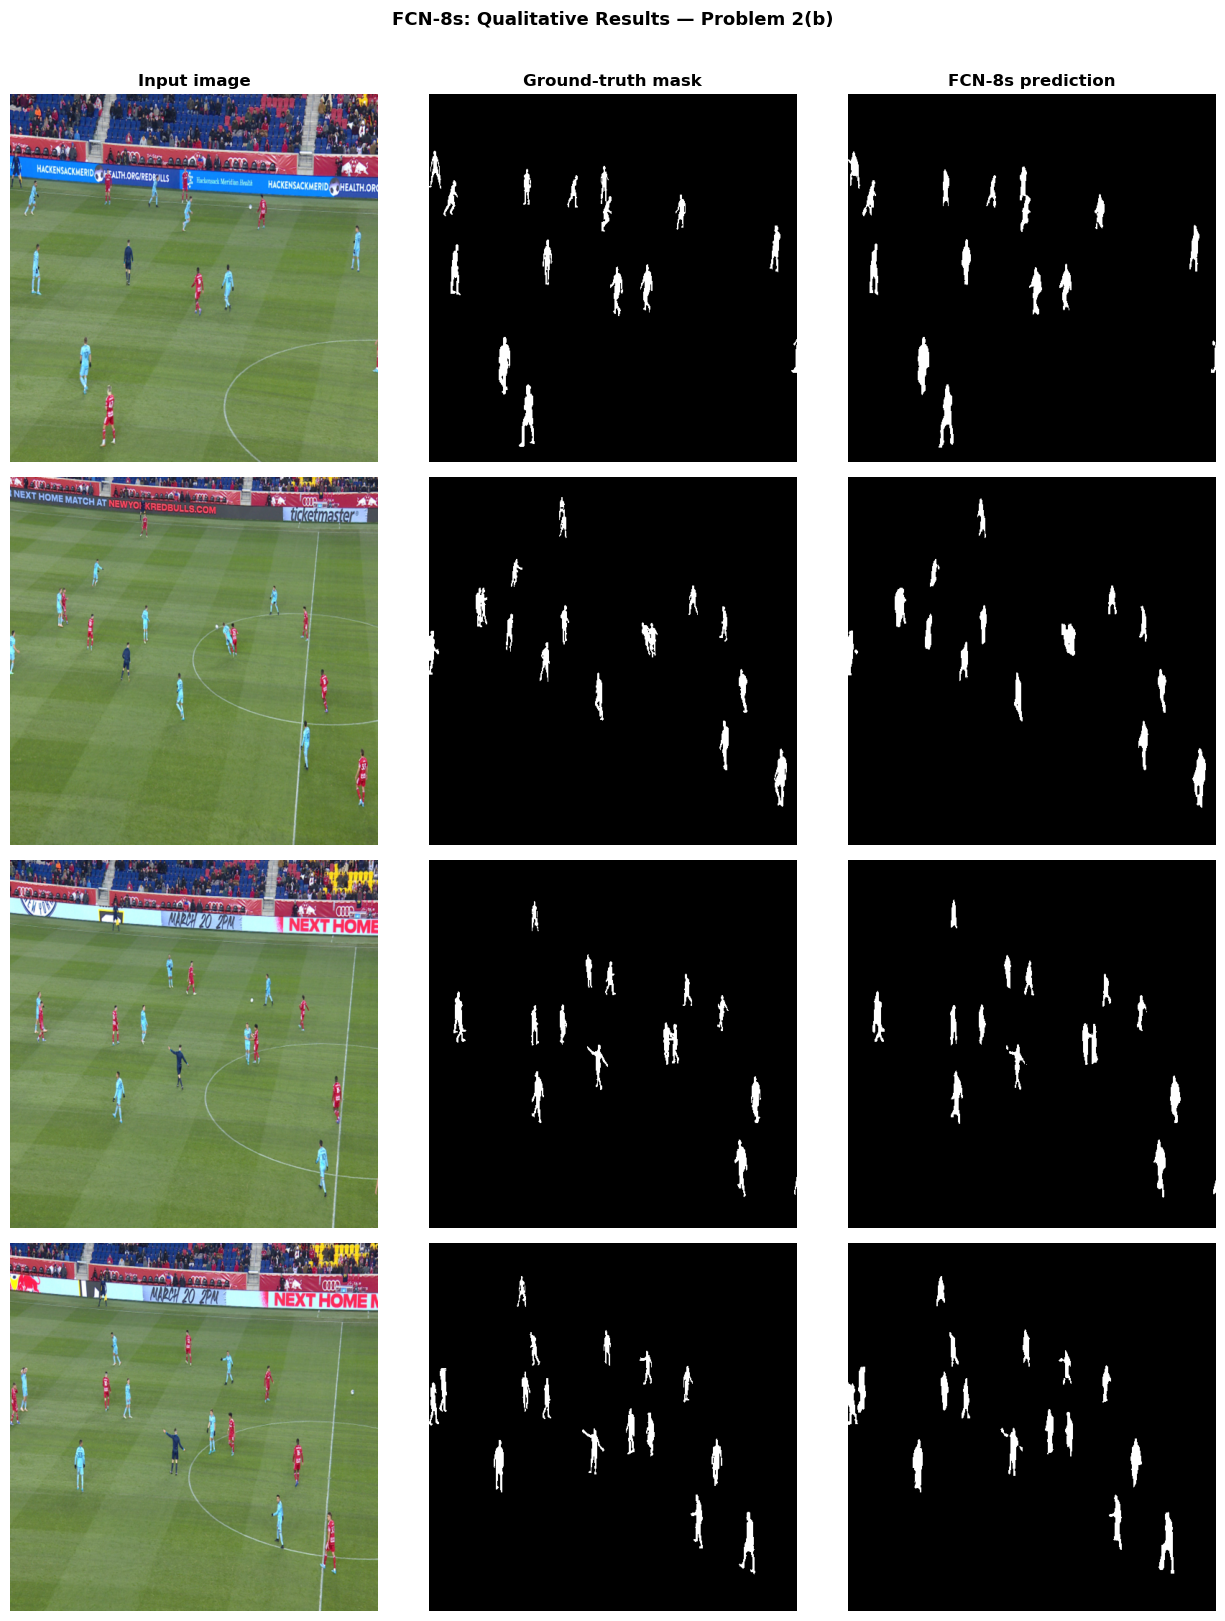

In [26]:

# ─────────────────────────────────────────────────────────────────────────────
# Results: Problem 2(b) — FCN-8s
# ─────────────────────────────────────────────────────────────────────────────

# ── 1. Load best checkpoint and evaluate on test set ─────────────────────────
model_2b.load_state_dict(torch.load(SAVE_PATH_8s, map_location=device))

_, final_acc_8s, final_miou_8s, final_conf_8s = evaluate(
    model_2b, test_loader, None, device, NUM_CLASSES)

class_names = ['background', 'person']
print("=" * 50)
print("  FCN-8s  ·  Problem 2(b) — Test-set results")
print("=" * 50)
print(f"  Pixel Accuracy : {final_acc_8s:.4f}  ({final_acc_8s*100:.2f} %)")
print(f"  Mean IoU       : {final_miou_8s:.4f}  ({final_miou_8s*100:.2f} %)")
print()
print("  Per-class IoU:")
for c, name in enumerate(class_names):
    tp    = final_conf_8s[c, c]
    denom = final_conf_8s[c, :].sum() + final_conf_8s[:, c].sum() - tp
    print(f"    [{c}] {name:<12} : {tp/denom:.4f}" if denom > 0 else f"    [{c}] {name:<12} : N/A")
print()
print("  Confusion matrix  (rows=GT, cols=Pred):")
print(f"  {'':12s}", end='')
for name in class_names:
    print(f"  {name:>12}", end='')
print()
for r, rname in enumerate(class_names):
    print(f"  {rname:<12}", end='')
    for c in range(len(class_names)):
        print(f"  {final_conf_8s[r, c]:>12,}", end='')
    print()

# ── 2. Training curves ────────────────────────────────────────────────────────
epochs_8s = range(1, len(history_8s['train_loss']) + 1)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('FCN-8s Training Curves — Problem 2(b)', fontweight='bold')

axes[0].plot(epochs_8s, history_8s['train_loss'], color='tab:blue', linewidth=2)
axes[0].set_xlabel('Epoch'); axes[0].set_ylabel('Dice Loss')
axes[0].set_title('Dice Loss (train)'); axes[0].grid(True, alpha=0.4)

axes[1].plot(epochs_8s, history_8s['pixel_acc'], color='tab:green', linewidth=2)
axes[1].set_xlabel('Epoch'); axes[1].set_ylabel('Pixel Accuracy')
axes[1].set_title('Pixel Accuracy (train)'); axes[1].grid(True, alpha=0.4)

axes[2].plot(epochs_8s, history_8s['miou'], color='tab:orange', linewidth=2)
axes[2].set_xlabel('Epoch'); axes[2].set_ylabel('mIoU')
axes[2].set_title('Mean IoU (train)'); axes[2].grid(True, alpha=0.4)

plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'fcn8s_training_curves.png'), dpi=150)
plt.show()

# ── 3. Qualitative predictions ────────────────────────────────────────────────
N_VIS = 4
fig, axes = plt.subplots(N_VIS, 3, figsize=(13, 4 * N_VIS))
col_titles = ['Input image', 'Ground-truth mask', 'FCN-8s prediction']
for col, title in enumerate(col_titles):
    axes[0, col].set_title(title, fontsize=12, fontweight='bold')

vis_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
model_2b.eval()
with torch.no_grad():
    for i, (img, mask) in enumerate(vis_loader):
        if i >= N_VIS:
            break
        pred    = model_2b(img.to(device)).argmax(dim=1).squeeze(0).cpu().numpy()
        img_np  = denorm(img.squeeze(0))
        mask_np = mask.squeeze(0).numpy()

        axes[i, 0].imshow(img_np);                                axes[i, 0].axis('off')
        axes[i, 1].imshow(mask_np, cmap='gray', vmin=0, vmax=1); axes[i, 1].axis('off')
        axes[i, 2].imshow(pred,    cmap='gray', vmin=0, vmax=1); axes[i, 2].axis('off')

plt.suptitle('FCN-8s: Qualitative Results — Problem 2(b)',
             fontsize=13, fontweight='bold', y=1.01)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'fcn8s_qualitative.png'), dpi=150, bbox_inches='tight')
plt.show()
